> # Cafe Sales Data Cleaning Project
>
> This notebook performs comprehensive data cleaning on cafe sales data to prepare it for analysis. The dataset contains information about cafe transactions including items, quantities, prices, payment methods, and locations.
>
> ## Objectives:
>- Identify and handle missing values
>- Clean inconsistent data entries (ERROR, UNKNOWN values)
>- Convert data types to appropriate formats
>- Handle outliers and duplicate records
>- Export cleaned dataset for further analysis
---

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('dirty_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


>## 1. Data Loading and Initial Exploration
>
>First, let's load the data and understand its structure:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [3]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [4]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [5]:
df.head(100)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
95,TXN_8268061,Salad,3,5.0,15.0,ERROR,Takeaway,2023-08-20
96,TXN_5220895,Salad,5,5.0,25.0,Cash,In-store,2023-06-10
97,TXN_3085509,Coffee,4,2.0,8.0,Digital Wallet,In-store,2023-04-15
98,TXN_9999113,Juice,4,3.0,12.0,Cash,Takeaway,2023-05-27


In [6]:
df.value_counts()

Transaction ID  Item      Quantity  Price Per Unit  Total Spent  Payment Method  Location  Transaction Date
TXN_9999124     Juice     2         3.0             6.0          Digital Wallet  Takeaway  UNKNOWN             1
TXN_1000555     Tea       1         1.5             1.5          Credit Card     In-store  2023-10-19          1
TXN_1001832     Salad     2         5.0             10.0         Cash            Takeaway  UNKNOWN             1
TXN_1002457     Cookie    5         1.0             5.0          Digital Wallet  Takeaway  2023-09-29          1
TXN_1004184     Smoothie  1         4.0             4.0          Credit Card     In-store  2023-05-18          1
                                                                                                              ..
TXN_1010950     Cookie    ERROR     1.0             1.0          Digital Wallet  Takeaway  2023-01-07          1
TXN_1009421     Cookie    4         1.0             4.0          Cash            Takeaway  2023-02-21

>## The dataframe has missing values and some columns contain non-numeric or inconsistent data (e.g., 'ERROR', 'UNKNOWN').
>## Data cleaning is needed before analysis.


In [7]:
df.nunique()

Transaction ID      10000
Item                   10
Quantity                7
Price Per Unit          8
Total Spent            19
Payment Method          5
Location                4
Transaction Date      367
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.sample()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8446,TXN_4870483,Coffee,1,2.0,2.0,NaN,Takeaway,2023-03-03


>## 2. Data Quality Assessment
>
>Now let's examine the data quality issues including missing values, duplicates, and data types:

In [10]:
df.describe(include='all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [11]:
# To get the column names and their data types
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

>### Lets check for NULL Values

In [12]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [13]:
df['Item'].value_counts(dropna=False)

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
NaN          333
ERROR        292
Name: count, dtype: int64

> ### Identifying Dirty Data Patterns
> Let's examine each column for dirty data patterns like 'UNKNOWN', 'ERROR', 'N/A', etc.:

In [14]:
df['Quantity'].value_counts(dropna=False)

Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
NaN         138
Name: count, dtype: int64

In [15]:
df['Price Per Unit'].value_counts(dropna=False)

Price Per Unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
NaN         179
UNKNOWN     164
Name: count, dtype: int64

In [16]:
df['Total Spent'].value_counts(dropna=False)

Total Spent
6.0        979
12.0       939
3.0        930
4.0        923
20.0       746
15.0       734
8.0        677
10.0       524
2.0        497
9.0        479
5.0        468
16.0       444
25.0       259
7.5        237
1.0        232
4.5        225
1.5        205
NaN        173
UNKNOWN    165
ERROR      164
Name: count, dtype: int64

In [17]:
df['Payment Method'].value_counts(dropna=False)

Payment Method
NaN               2579
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

In [18]:
df['Location'].value_counts(dropna=False)

Location
NaN         3265
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

In [19]:
df['Transaction Date'].value_counts(dropna=False)


Transaction Date
UNKNOWN       159
NaN           159
ERROR         142
2023-06-16     40
2023-02-06     40
             ... 
2023-11-24     15
2023-07-30     15
2023-03-11     14
2023-07-22     14
2023-02-17     14
Name: count, Length: 368, dtype: int64

>## 3. Data Cleaning Process
>
>### Step 1: Replace Dirty Values with NaN
>
>First, we'll replace all 'UNKNOWN' and 'ERROR' values with NaN for consistent handling:

In [20]:
df.replace(['UNKNOWN', 'ERROR'], np.nan, inplace=True)

In [21]:
df.isnull().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

>### Verifying to check is it setteled or not!

In [22]:
df['Price Per Unit'].value_counts(dropna=False)

Price Per Unit
3.0    2429
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
NaN     533
Name: count, dtype: int64

In [23]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [24]:
df.isnull().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

> ### lets check the NaN distributation over location

In [25]:
df_nan = df[df['Item'].isnull()]

In [26]:
df_nan.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6,TXN_4433211,NaN,3,3.0,9.0,NaN,Takeaway,2023-10-06
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
14,TXN_8915701,NaN,2,1.5,3.0,NaN,In-store,2023-03-21
30,TXN_1736287,NaN,5,2.0,10.0,Digital Wallet,NaN,2023-06-02
31,TXN_8927252,NaN,2,1.0,NaN,Credit Card,NaN,2023-11-06


In [27]:
df[df['Item'].isnull()]['Location'].value_counts(dropna=False)

Location
NaN         378
Takeaway    297
In-store    294
Name: count, dtype: int64

In [28]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9031,9521,9467,9498,6822,6039,9540
unique,10000,8,5,6,17,3,2,365
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,2023-06-16
freq,1,1171,2013,2429,979,2291,3022,40


In [29]:
df['Payment Method'].value_counts(dropna=False)

Payment Method
NaN               3178
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64

In [30]:
df[df['Location'].notnull()].groupby('Payment Method')['Location'].value_counts(normalize=True)

Payment Method  Location
Cash            In-store    0.513909
                Takeaway    0.486091
Credit Card     In-store    0.504444
                Takeaway    0.495556
Digital Wallet  Takeaway    0.517026
                In-store    0.482974
Name: proportion, dtype: float64

In [31]:
df.fillna({'Location':'Unknown'}, inplace=True)

In [32]:
df['Location'].value_counts(dropna=False)

Location
Unknown     3961
Takeaway    3022
In-store    3017
Name: count, dtype: int64

In [33]:
df.isnull().sum()

Transaction ID         0
Item                 969
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      3178
Location               0
Transaction Date     460
dtype: int64

In [34]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9031,9521,9467,9498,6822,10000,9540
unique,10000,8,5,6,17,3,3,365
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Unknown,2023-06-16
freq,1,1171,2013,2429,979,2291,3961,40


<Axes: ylabel='Count'>

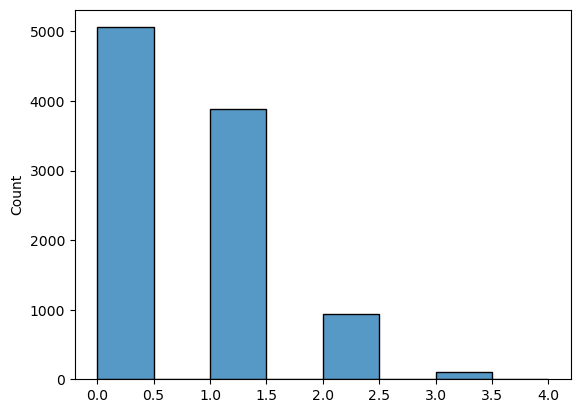

In [35]:
import seaborn as sns
sns.histplot(df.isnull().sum(axis=1), bins=8)

In [36]:
# Count how many missing values each row has
df.isnull().sum(axis=1).value_counts().sort_index()


0    5059
1    3886
2     937
3     111
4       7
Name: count, dtype: int64

>### Step 2: Handle Rows with Multiple Missing Values
>
>Remove rows with too many missing values (4 or more columns missing) as they provide little information:

In [37]:
df = df[df.isnull().sum(axis=1) < 4]

In [38]:
# Safest and cleanest for current goals
df['Item'].fillna('Unknown Item', inplace=True)


C:\Users\Om\AppData\Local\Temp\ipykernel_11016\1889717861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item'].fillna('Unknown Item', inplace=True)


In [39]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity             476
Price Per Unit       528
Total Spent          498
Payment Method      3171
Location               0
Transaction Date     456
dtype: int64

> ### How many rows have that worst‑case combo?

In [40]:
mask = df['Item'].isna() & df['Price Per Unit'].isna()
mask.sum()


np.int64(0)

In [41]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

>### Step 3: Data Type Conversion and Column-Specific Cleaning
>
>Converting numeric columns to proper data types and handling missing values strategically:

In [42]:
df['Quantity'] = df.groupby('Item')['Quantity'].transform(lambda x: x.fillna(x.median()))

In [43]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit       528
Total Spent          498
Payment Method      3171
Location               0
Transaction Date     456
dtype: int64

In [44]:
df.dtypes

Transaction ID       object
Item                 object
Quantity            float64
Price Per Unit      float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
dtype: object

In [46]:
df['Price Per Unit'].value_counts(dropna=False, normalize=True)

Price Per Unit
3.0    0.242970
4.0    0.233163
2.0    0.122786
5.0    0.120484
1.0    0.114380
1.5    0.113379
NaN    0.052837
Name: proportion, dtype: float64

In [47]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())

In [48]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent           17
Payment Method      3171
Location               0
Transaction Date     456
dtype: int64

In [49]:
mask = df['Total Spent'].isnull()
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Price Per Unit'] * df.loc[mask, 'Quantity']

>### Step 4: Calculate Missing Total Spent Values
>
>For rows where Total Spent is missing, calculate it using Price Per Unit × Quantity:

In [50]:
df.isnull().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      3171
Location               0
Transaction Date     456
dtype: int64

In [54]:
df['Payment Method'].value_counts(dropna= False)

Payment Method
NaN               3171
Digital Wallet    2291
Credit Card       2273
Cash              2258
Name: count, dtype: int64

In [55]:
df['Payment Method'] = df['Payment Method'].fillna('Unknown')

In [56]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

>### Step 5: Handle Payment Method and Date Conversion
>
>Clean remaining categorical and date columns:

In [57]:
df.isnull().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    456
dtype: int64

In [58]:
df['Transaction Date'].value_counts(dropna=False)

Transaction Date
NaT           456
2023-06-16     40
2023-02-06     40
2023-09-21     39
2023-07-21     39
             ... 
2023-11-24     15
2023-04-27     15
2023-07-22     14
2023-02-17     14
2023-03-11     14
Name: count, Length: 366, dtype: int64

In [59]:
df[df['Transaction Date'].isna()].head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
11,TXN_3051279,Sandwich,2.0,4.0,8.0,Credit Card,Takeaway,NaT
29,TXN_7640952,Cake,4.0,3.0,12.0,Digital Wallet,Takeaway,NaT
33,TXN_7710508,Unknown Item,5.0,1.0,5.0,Cash,Unknown,NaT
77,TXN_2091733,Salad,1.0,5.0,5.0,Unknown,In-store,NaT
103,TXN_7028009,Cake,4.0,3.0,12.0,Unknown,Takeaway,NaT


In [60]:
df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9993.000000,9993.000000,9993.000000,9537
mean,3.027019,2.952517,8.929200,2023-07-01 22:16:52.393834752
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.384848,1.244351,5.996059,NaN


>## 4. Final Data Export
>
>Our data cleaning process is now complete. Let's export the cleaned dataset:

In [61]:
df.to_csv('cleaned_cafe_sales.csv', index=False)

>## Summary
>
>Our data cleaning process successfully addressed the following issues:
>
>1. **Missing Values**: Replaced 'UNKNOWN' and 'ERROR' entries with NaN for consistent handling
>2. **Data Types**: Converted quantity, price, and total spent columns to numeric types
>3. **Strategic Imputation**: 
>   - Filled missing quantities using median values grouped by item
>   - Filled missing prices using overall median
>   - Calculated missing total spent values using price × quantity
>4. **Categorical Data**: Handled missing payment methods and locations appropriately
>5. **Date Processing**: Converted transaction dates to proper datetime format
>6. **Data Quality**: Removed rows with excessive missing data (4+ missing columns)>
>
>The cleaned dataset is now ready for analysis and has been exported as 'cleaned_cafe_sales.csv'.